In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [37]:
data = pd.read_csv("/content/drive/MyDrive/Salary_Data.csv")

In [39]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.1,39343.0
1,1,1.3,46205.0
2,2,1.5,37731.0
3,3,2.0,43525.0
4,4,2.2,39891.0
5,5,2.9,56642.0
6,6,3.0,60150.0
7,7,3.2,54445.0
8,8,3.2,64445.0
9,9,3.7,57189.0


In [40]:
#data.drop('YearsExperience', axis=1)

data = data.drop("Unnamed: 0", axis=1)

In [9]:
#data.drop(3, axis=0, inplace=True)

In [41]:
X = data["YearsExperience"]
y = data["Salary"]

In [42]:
X = data.drop('Salary',axis=1)
y = data['Salary']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [44]:
linear_regressor = LinearRegression()

In [10]:
X_train.shape

(21,)

In [45]:
linear_regressor.fit(X_train.values.reshape((-1, 1)), y_train.values.reshape((-1, 1)))

LinearRegression()

In [46]:
print(linear_regressor.intercept_)

print(linear_regressor.coef_)

[25789.06076797]
[[9479.09167874]]


In [47]:
X_test = X_test.values.reshape((-1, 1))

In [48]:
y_pred = linear_regressor.predict(X_test)

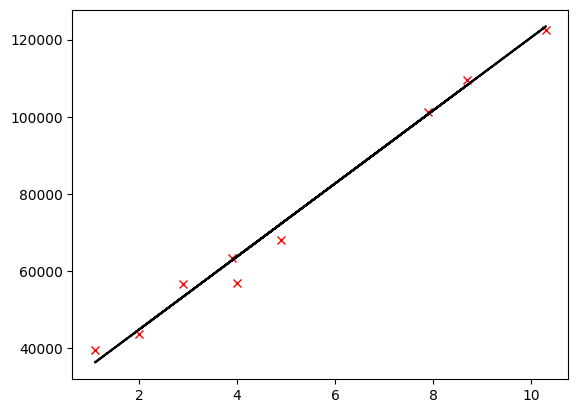

In [49]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

In [99]:
data.loc[data['Salary'] < 50000, 'Salary'] = np.nan

In [100]:
data

,YearsExperience,Salary
0,1.1,NaN
1,1.3,NaN
2,1.5,NaN
3,2.0,NaN
4,2.2,NaN
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [72]:
pipeline = Pipeline([
    ("fill_nan_values", SimpleImputer())
])

In [73]:
 pd.DataFrame(pipeline.fit_transform(data), columns=data.columns)

,YearsExperience,Salary
0,1.1,82935.8
1,1.3,82935.8
2,1.5,82935.8
3,2.0,82935.8
4,2.2,82935.8
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [101]:
X = data.drop("Salary", axis=1)
y = data["Salary"]

# Impute missing values in the target variable 'y' using SimpleImputer
imputer = SimpleImputer(strategy="mean")
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Create a pipeline for feature preprocessing and modeling
pipeline = Pipeline([
    ("fill_nan_values", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),   # Optional: You can add more preprocessing steps if needed
    ("ML_model", LinearRegression())
])

In [103]:
pipeline.fit(X, y_imputed)

Pipeline(steps=[('fill_nan_values', SimpleImputer()),
                ('scaler', StandardScaler()),
                ('ML_model', LinearRegression())])

In [104]:
y_imputed

array([ 82935.8,  82935.8,  82935.8,  82935.8,  82935.8,  56642. ,
        60150. ,  54445. ,  64445. ,  57189. ,  63218. ,  55794. ,
        56957. ,  57081. ,  61111. ,  67938. ,  66029. ,  83088. ,
        81363. ,  93940. ,  91738. ,  98273. , 101302. , 113812. ,
       109431. , 105582. , 116969. , 112635. , 122391. , 121872. ])

In [105]:
y

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [107]:
pipeline.fit(data.drop("Salary", axis=1),y_imputed)

Pipeline(steps=[('fill_nan_values', SimpleImputer()),
                ('scaler', StandardScaler()),
                ('ML_model', LinearRegression())])

In [108]:
pipeline.predict(data.drop("Salary", axis=1))

array([ 56975.76372812,  58208.0439309 ,  59440.32413368,  62521.02464063,
        63753.30484341,  68066.28555313,  68682.42565452,  69914.7058573 ,
        69914.7058573 ,  72995.40636425,  74227.68656703,  74843.82666842,
        74843.82666842,  75459.96676981,  77924.52717537,  80389.08758092,
        81621.3677837 ,  82853.64798648,  86550.48859482,  87166.62869621,
        92095.74950732,  93944.16981149,  98873.29062261, 100721.71092678,
       103802.41143373, 105650.83173789, 108731.53224484, 109347.67234623,
       113660.65305596, 114892.93325874])

In [109]:
 pipeline.named_steps["fill_nan_values"].statistics_

array([5.31333333])